In [20]:
import matplotlib.pyplot as plt
#from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import numpy as np
import os

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn import datasets

In [21]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

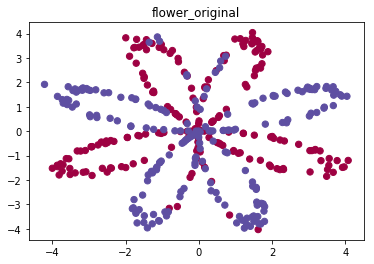

In [23]:
X, Y = load_planar_dataset()
name = 'flower'
X = X.T
Y = Y[0]
plt.scatter(X[:, 0], X[:, 1], c=Y , s=40, cmap=plt.cm.Spectral);
plt.title(name+'_original')
plt.savefig(os.path.join('pic', name+'_original'))
plt.show()

(200, 2)
(200,)


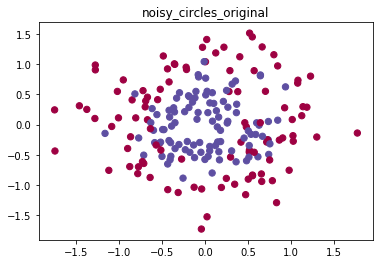

(200, 2)
(200,)


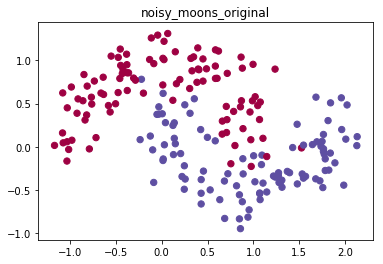

(200, 2)
(200,)


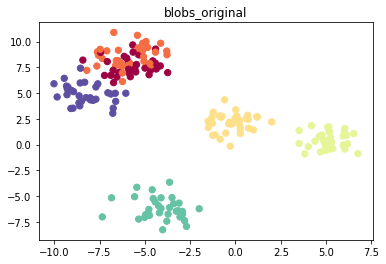

(200, 2)
(200,)


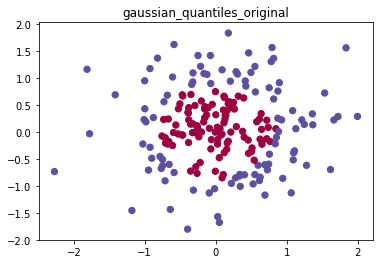

In [24]:
# load dataset
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

datas = [(name, X, Y), ]
for name, dataset in datasets.items():
    X, Y = datasets[name]
    datas.append((name, X, Y))
    
    print(X.shape)
    print(Y.shape)

    # Visualize the data
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.title(name+'_original')
    plt.savefig(os.path.join('pic', name+'_original'))
    plt.show()

In [26]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from collections import Counter
# n_clusters= 2

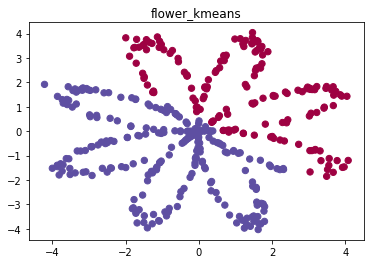

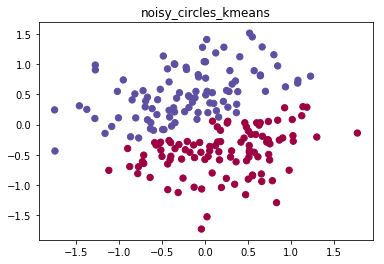

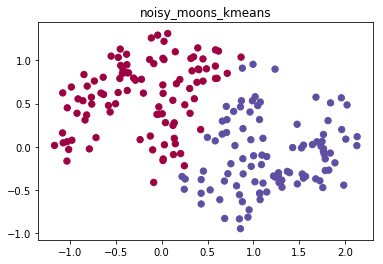

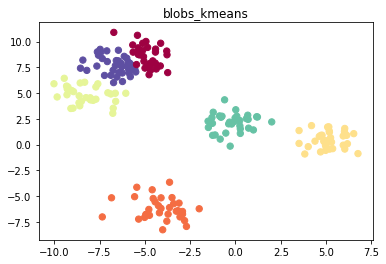

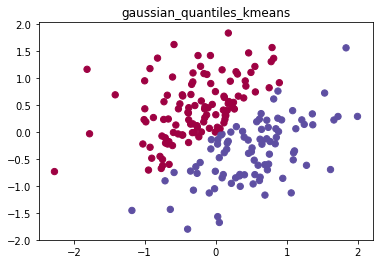

In [27]:
for name, X, Y in datas:
#     print("expected")
#     plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
#     plt.show()
#     print("clustered")
    n_clusters = len(set(Y))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans, s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_kmeans')
    plt.savefig(os.path.join('pic', name+'_kmeans'))
    plt.show()

expected


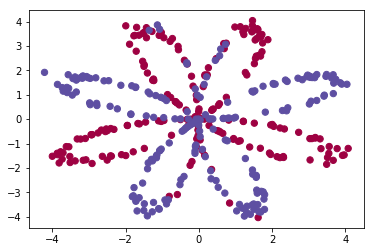

clustered


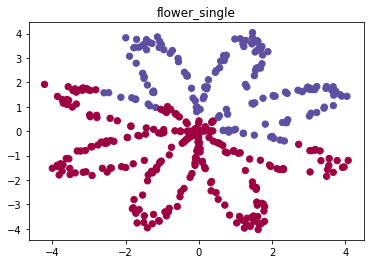

expected


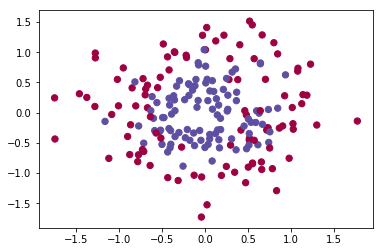

clustered


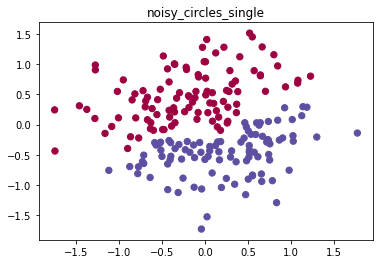

expected


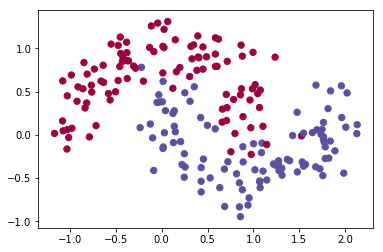

clustered


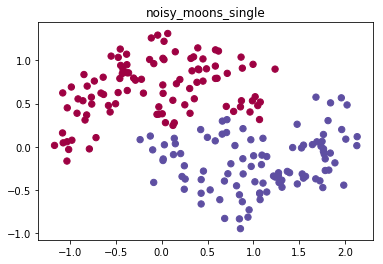

expected


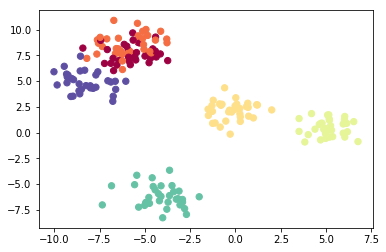

clustered


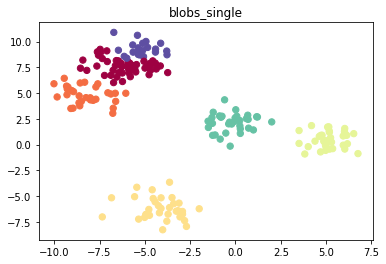

expected


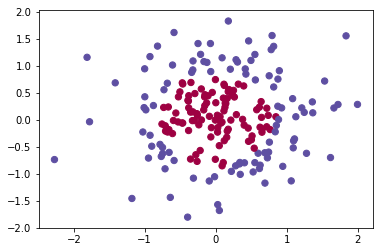

clustered


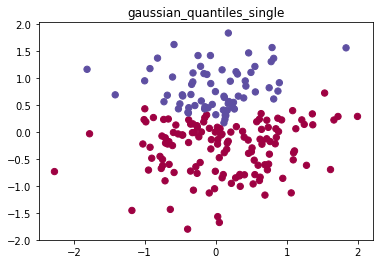

In [28]:
linkage = ['ward', 'average', 'complete']
for name, X, Y in datas:
    print("expected")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    print("clustered")
    n_clusters = len(set(Y))
    hierarchy = AgglomerativeClustering(linkage=linkage[0], n_clusters=n_clusters).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=hierarchy, s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_single')
    plt.savefig(os.path.join('pic', name+'_single'))
    plt.show()

expected


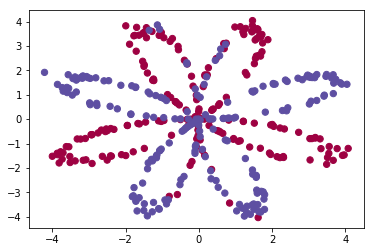

clustered


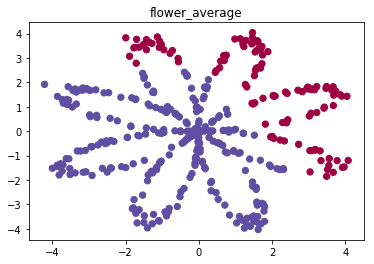

expected


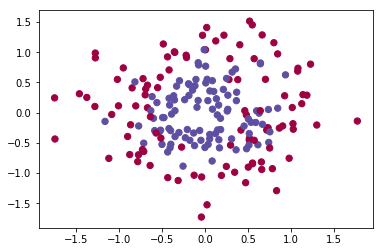

clustered


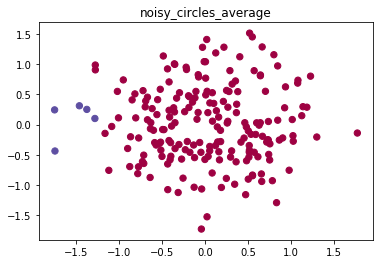

expected


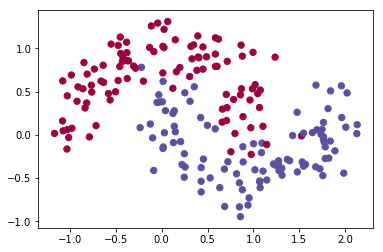

clustered


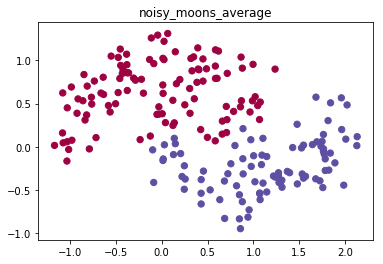

expected


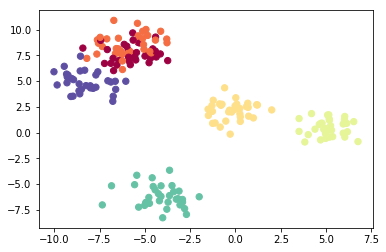

clustered


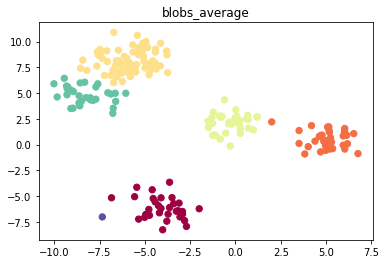

expected


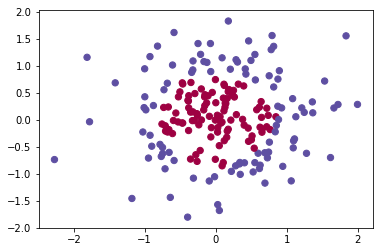

clustered


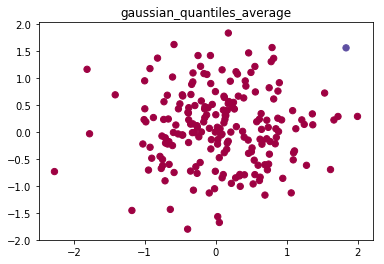

In [29]:
linkage = ['ward', 'average', 'complete']
for name, X, Y in datas:
    print("expected")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    print("clustered")
    n_clusters = len(set(Y))
    hierarchy = AgglomerativeClustering(linkage=linkage[1], n_clusters=n_clusters).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=hierarchy, s=40, cmap=plt.cm.Spectral)
    plt.title(name+'_average')
    plt.savefig(os.path.join('pic', name+'_average'))
    plt.show()

expected


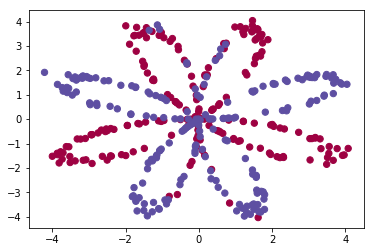

clustered


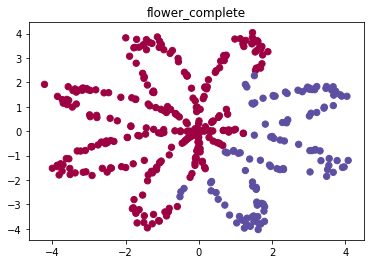

expected


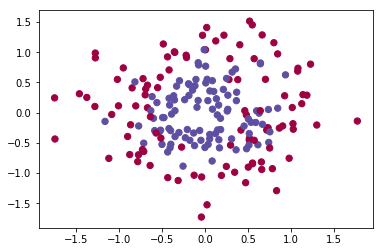

clustered


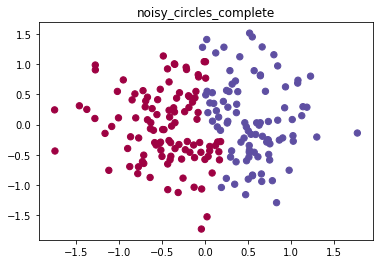

expected


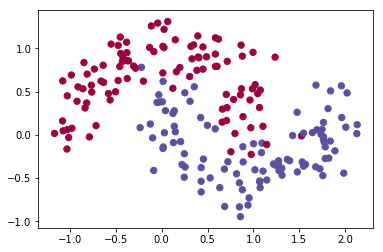

clustered


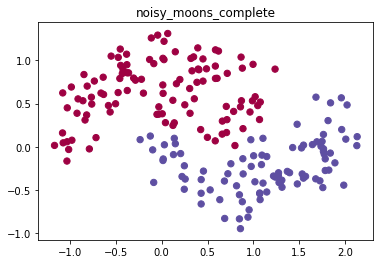

expected


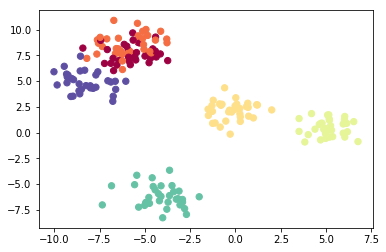

clustered


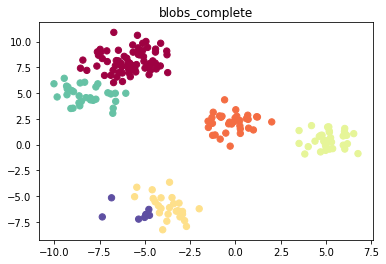

expected


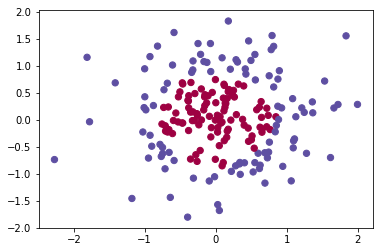

clustered


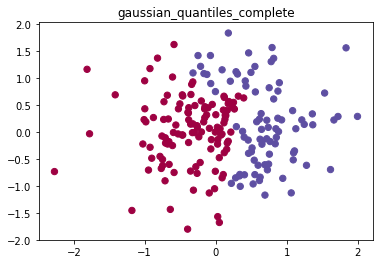

In [30]:
linkage = ['ward', 'average', 'complete']
for name, X, Y in datas:
    print("expected")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    print("clustered")
    n_clusters = len(set(Y))
    hierarchy = AgglomerativeClustering(linkage=linkage[2], n_clusters=n_clusters).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=hierarchy, s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_complete')
    plt.savefig(os.path.join('pic', name+'_complete'))
    plt.show()

expected


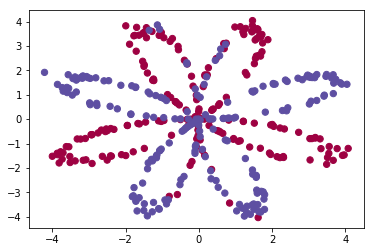

clustered


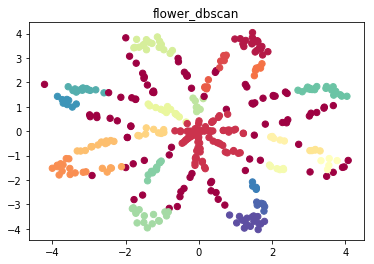

expected


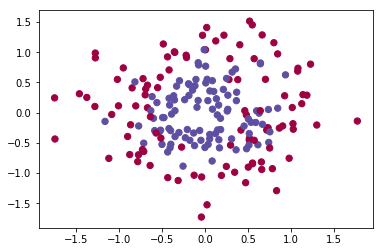

clustered


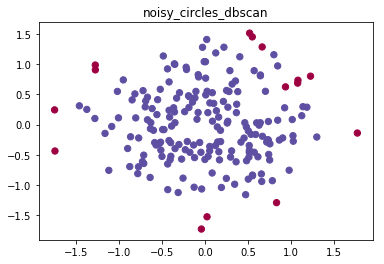

expected


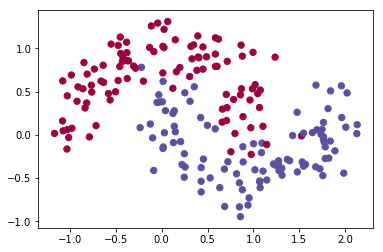

clustered


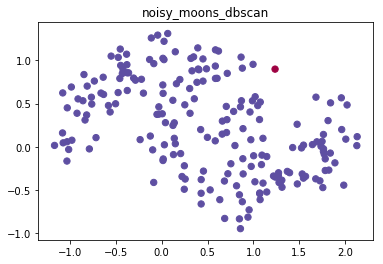

expected


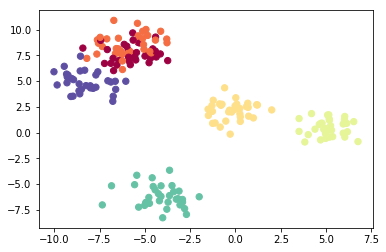

clustered


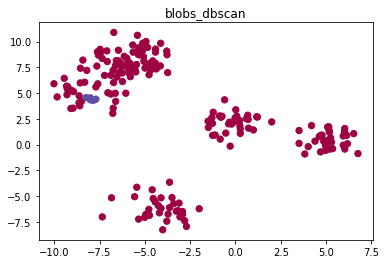

expected


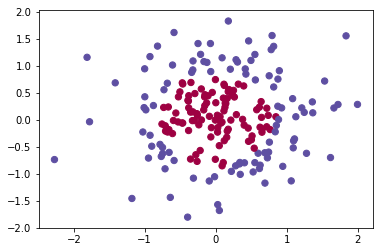

clustered


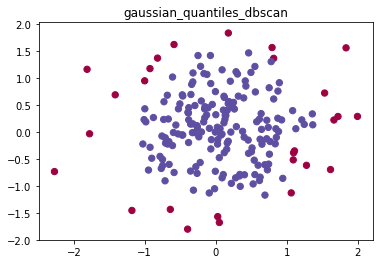

In [31]:
for name, X, Y in datas:
    print("expected")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    print("clustered")
    n_clusters = len(set(Y))
    dbscan = DBSCAN(eps=0.3).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=dbscan, s=40, cmap=plt.cm.Spectral)
    plt.title(name+'_dbscan')
    plt.savefig(os.path.join('pic', name+'_dbscan'))
    plt.show()

expected


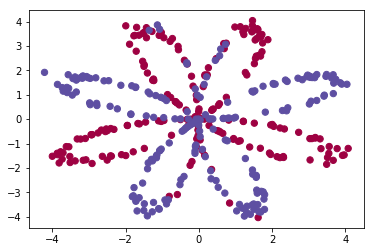

clustered


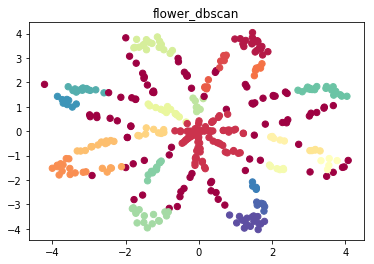

expected


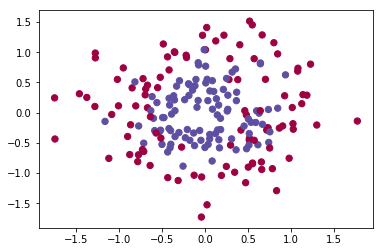

clustered


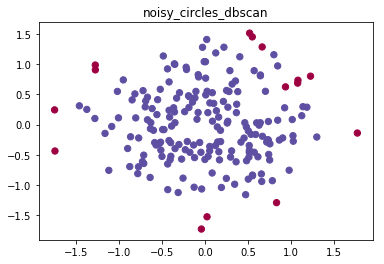

expected


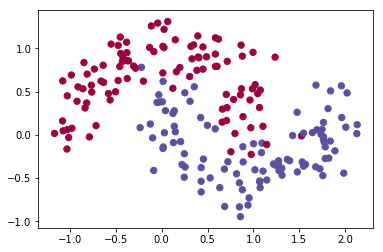

clustered


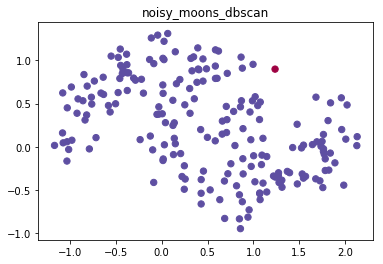

expected


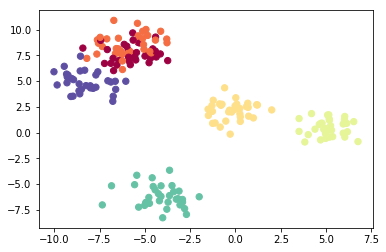

clustered


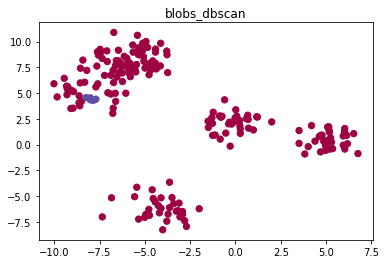

expected


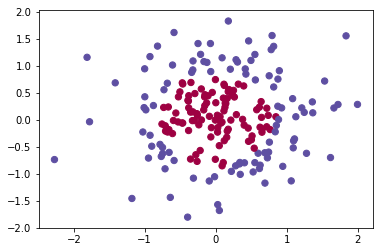

clustered


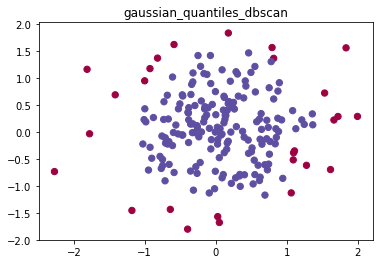

In [32]:
for name, X, Y in datas:
    print("expected")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    print("clustered")
    n_clusters = len(set(Y))
    dbscan = DBSCAN(eps=0.3).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=dbscan, s=40, cmap=plt.cm.Spectral)
    plt.title(name+'_dbscan')
    plt.savefig(os.path.join('pic', name+'_dbscan'))
    plt.show()

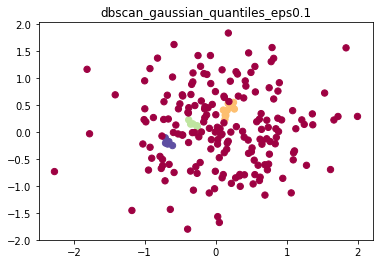

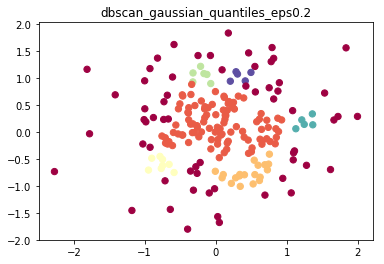

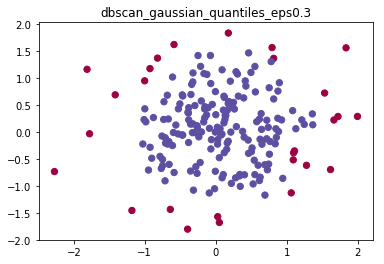

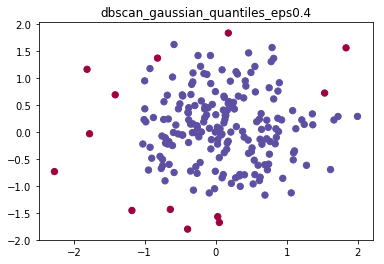

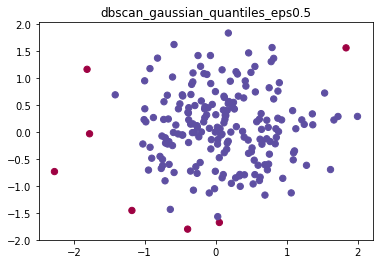

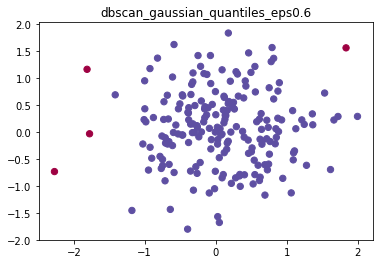

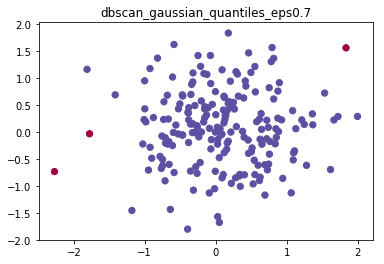

In [33]:
for name, X, Y in datas[4:5]:
#     print("expected")
#     plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
#     plt.show()
#     print("clustered")
    for e in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
        n_clusters = len(set(Y))
        dbscan = DBSCAN(eps=e).fit_predict(X)
        plt.scatter(X[:, 0], X[:, 1], c=dbscan, s=40, cmap=plt.cm.Spectral)
        plt.title('dbscan_' + name + '_' + 'eps' + str(e))
#         plt.savefig(os.path.join('pic', 'dbscan_' + name + '_' + 'eps' + str(e).replace('.', '')))
        plt.show()

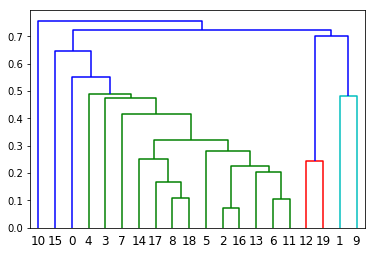

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
Z = linkage(X[:20], 'single')
plt.figure()
dn = dendrogram(Z)
plt.show()